<a href="https://colab.research.google.com/github/PawarSneha12/Technocolabs/blob/main/Naive_Bayes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### Load Data

In [3]:
df_bandora=pd.read_csv('/content/drive/MyDrive/Bondora_raw.csv')
print(df_bandora.shape)

(134529, 112)


## Preprocessing

In [4]:
df_bandora.head()

,ReportAsOfEOD,LoanId,LoanNumber,ListedOnUTC,BiddingStartedOn,BidsPortfolioManager,BidsApi,BidsManual,UserName,NewCreditCustomer,...,PreviousEarlyRepaymentsCountBeforeLoan,GracePeriodStart,GracePeriodEnd,NextPaymentDate,NextPaymentNr,NrOfScheduledPayments,ReScheduledOn,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost,ActiveLateLastPaymentCategory
0,2020-01-27,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,2009-06-11 16:40:39,2009-06-11 16:40:39,0,0,115.0410,KARU,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,2020-01-27,978BB85B-1C69-4D51-8447-9C240104A3A2,654,2009-06-10 15:48:57,2009-06-10 15:48:57,0,0,140.6057,koort681,False,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
2,2020-01-27,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,2009-06-05 19:12:29,2009-06-05 19:12:29,0,0,319.5580,0ie,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+
3,2020-01-27,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,2009-06-13 12:01:20,2009-06-13 12:01:20,0,0,57.5205,Alyona,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
4,2020-01-27,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,2009-06-10 10:17:13,2009-06-10 10:17:13,0,0,319.5582,Kai,True,...,0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,180+


In [5]:
df_bandora.isnull().sum()

ReportAsOfEOD                              0
LoanId                                     0
LoanNumber                                 0
ListedOnUTC                                0
BiddingStartedOn                           0
                                       ...  
NrOfScheduledPayments                  36741
ReScheduledOn                          94207
PrincipalDebtServicingCost             75400
InterestAndPenaltyDebtServicingCost    75400
ActiveLateLastPaymentCategory          82279
Length: 112, dtype: int64

In [6]:
df_bandora.duplicated().sum()

0

In [7]:
# Calculate the percentage of null values in each column
null_percentages = df_bandora.isnull().sum() / len(df_bandora) * 100

# Identify columns with more than 75% null values
columns_to_drop = null_percentages[null_percentages >= 75].index
columns_to_drop

Index(['EL_V0', 'Rating_V0', 'EL_V1', 'Rating_V1', 'Rating_V2',
       'CreditScoreEsEquifaxRisk', 'CreditScoreFiAsiakasTietoRiskGrade',
       'GracePeriodStart', 'GracePeriodEnd'],
      dtype='object')

In [8]:
df_bandora = df_bandora.drop(columns_to_drop, axis=1)

In [9]:
print(df_bandora.shape)

(134529, 103)


In [10]:
df_bandora.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 103 columns):
 #    Column                                  Dtype  
---   ------                                  -----  
 0    ReportAsOfEOD                           object 
 1    LoanId                                  object 
 2    LoanNumber                              int64  
 3    ListedOnUTC                             object 
 4    BiddingStartedOn                        object 
 5    BidsPortfolioManager                    int64  
 6    BidsApi                                 int64  
 7    BidsManual                              float64
 8    UserName                                object 
 9    NewCreditCustomer                       bool   
 10   LoanApplicationStartedDate              object 
 11   LoanDate                                object 
 12   ContractEndDate                         object 
 13   FirstPaymentDate                        object 
 14   MaturityDate_Origi

In [11]:
df_bandora.describe()

,LoanNumber,BidsPortfolioManager,BidsApi,BidsManual,ApplicationSignedHour,ApplicationSignedWeekday,VerificationType,LanguageCode,Age,Gender,...,InterestAndPenaltyBalance,NoOfPreviousLoansBeforeLoan,AmountOfPreviousLoansBeforeLoan,PreviousRepaymentsBeforeLoan,PreviousEarlyRepaymentsBefoleLoan,PreviousEarlyRepaymentsCountBeforeLoan,NextPaymentNr,NrOfScheduledPayments,PrincipalDebtServicingCost,InterestAndPenaltyDebtServicingCost
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134484.000000,134529.000000,134529.000000,134484.000000,...,134529.000000,134529.000000,134529.000000,91368.000000,58026.000000,134529.000000,97788.000000,97788.000000,59129.000000,59129.000000
mean,9.449392e+05,966.452876,29.111664,559.332590,13.374640,3.907908,2.817257,2.827874,40.819295,0.442097,...,701.567107,1.487620,2868.652401,928.395548,320.743805,0.069903,5.178795,50.126795,5.264702,89.851455
std,4.786738e+05,1355.686016,150.159148,750.360512,4.992375,1.726192,1.407908,1.959802,12.348693,0.636083,...,2514.595572,2.396148,4507.046575,2042.348751,1561.799076,0.359461,7.674427,12.519530,57.800582,287.449052
min,3.700000e+01,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,-2.660000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,6.206790e+05,155.000000,0.000000,96.000000,10.000000,2.000000,1.000000,1.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,36.000000,0.000000,0.000000
50%,9.235970e+05,465.000000,0.000000,317.000000,13.000000,4.000000,4.000000,3.000000,40.000000,0.000000,...,0.000000,1.000000,396.354100,197.980000,0.000000,0.000000,3.000000,60.000000,0.000000,0.000000
75%,1.311025e+06,1218.000000,5.000000,729.000000,17.000000,5.000000,4.000000,4.000000,50.000000,1.000000,...,202.900000,2.000000,4250.000000,780.950000,0.000000,0.000000,7.000000,60.000000,0.000000,17.330000
max,1.855339e+06,10625.000000,7570.000000,10630.000000,23.000000,7.000000,4.000000,22.000000,77.000000,2.000000,...,64494.770000,25.000000,53762.000000,34077.420000,48100.000000,11.000000,60.000000,72.000000,3325.330000,5295.290000


In [12]:
df_bandora.columns.to_list()

['ReportAsOfEOD',
 'LoanId',
 'LoanNumber',
 'ListedOnUTC',
 'BiddingStartedOn',
 'BidsPortfolioManager',
 'BidsApi',
 'BidsManual',
 'UserName',
 'NewCreditCustomer',
 'LoanApplicationStartedDate',
 'LoanDate',
 'ContractEndDate',
 'FirstPaymentDate',
 'MaturityDate_Original',
 'MaturityDate_Last',
 'ApplicationSignedHour',
 'ApplicationSignedWeekday',
 'VerificationType',
 'LanguageCode',
 'Age',
 'DateOfBirth',
 'Gender',
 'Country',
 'AppliedAmount',
 'Amount',
 'Interest',
 'LoanDuration',
 'MonthlyPayment',
 'County',
 'City',
 'UseOfLoan',
 'Education',
 'MaritalStatus',
 'NrOfDependants',
 'EmploymentStatus',
 'EmploymentDurationCurrentEmployer',
 'EmploymentPosition',
 'WorkExperience',
 'OccupationArea',
 'HomeOwnershipType',
 'IncomeFromPrincipalEmployer',
 'IncomeFromPension',
 'IncomeFromFamilyAllowance',
 'IncomeFromSocialWelfare',
 'IncomeFromLeavePay',
 'IncomeFromChildSupport',
 'IncomeOther',
 'IncomeTotal',
 'ExistingLiabilities',
 'LiabilitiesTotal',
 'RefinanceLiab

In [13]:
imp_col = ['LoanId', 'LoanNumber', 'Status', 'Amount', 'Interest', 'LoanDuration',
           'MonthlyPayment', 'Age', 'Gender', 'Country', 'Education', 'MaritalStatus',
           'EmploymentStatus', 'IncomeTotal', 'ExistingLiabilities', 'DebtToIncome',
           'CreditScoreEsMicroL', 'CreditScoreEeMini', 'PrincipalPaymentsMade',
           'InterestAndPenaltyPaymentsMade', 'DefaultDate', 'ActiveLateCategory',
           'WorseLateCategory']

# Create a new DataFrame with only the necessary columns
df_new = df_bandora[imp_col].copy()

df_new.head(7)


,LoanId,LoanNumber,Status,Amount,Interest,LoanDuration,MonthlyPayment,Age,Gender,Country,...,IncomeTotal,ExistingLiabilities,DebtToIncome,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,DefaultDate,ActiveLateCategory,WorseLateCategory
0,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,Repaid,115.0408,30.0,12,NaN,61,1.0,EE,...,10500.0,0,0.0,NaN,NaN,115.0408,20.4222,NaN,NaN,91-120
1,978BB85B-1C69-4D51-8447-9C240104A3A2,654,Repaid,140.6057,25.0,1,NaN,48,1.0,EE,...,10800.0,0,0.0,NaN,NaN,140.6057,2.0227,NaN,NaN,NaN
2,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,Late,319.5409,25.0,20,NaN,58,1.0,EE,...,7000.0,0,0.0,NaN,NaN,203.1909,59.7626,2012-07-16,180+,180+
3,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,Repaid,57.5205,45.0,15,NaN,23,1.0,EE,...,11600.0,0,0.0,NaN,NaN,57.5205,18.7323,NaN,NaN,31-60
4,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,Repaid,319.5436,30.0,12,NaN,25,1.0,EE,...,6800.0,0,0.0,NaN,NaN,319.5436,220.4200,2009-09-28,NaN,180+
5,621EEF09-2715-49CD-9C88-9C1F01231EAF,640,Repaid,300.4314,30.0,24,NaN,22,0.0,EE,...,9500.0,0,0.0,NaN,NaN,300.4314,124.2294,2011-04-06,NaN,180+
6,1A8651C1-4CC8-4500-B88F-9C2300A2DA91,649,Repaid,191.7445,32.0,20,NaN,47,1.0,EE,...,7200.0,0,0.0,NaN,NaN,191.7445,172.9222,2010-04-05,NaN,180+


In [14]:
df_new['DefaultDate'] = pd.to_datetime(df_new['DefaultDate'])
df_new['DefaultYear'] = df_new['DefaultDate'].dt.year

In [15]:
df_new.isnull().sum()

LoanId                                0
LoanNumber                            0
Status                                0
Amount                                0
Interest                              0
LoanDuration                          0
MonthlyPayment                     6685
Age                                   0
Gender                               45
Country                               0
Education                            45
MaritalStatus                        45
EmploymentStatus                    197
IncomeTotal                           0
ExistingLiabilities                   0
DebtToIncome                         45
CreditScoreEsMicroL               29574
CreditScoreEeMini                 62807
PrincipalPaymentsMade                 0
InterestAndPenaltyPaymentsMade        0
DefaultDate                       91614
ActiveLateCategory                86011
WorseLateCategory                 45456
DefaultYear                       91614
dtype: int64

In [16]:
df_new['DefaultYear'].fillna(df_new['DefaultYear'].mode()[0], inplace=True)

In [17]:
df_new['Gender'] = df_new['Gender'].map({0.0: 'Female', 1.0: 'Male'})

In [18]:
df_new['Education'].value_counts()

 4.0    51330
 5.0    35398
 3.0    29260
 1.0    12057
 2.0     6427
 0.0        8
-1.0        4
Name: Education, dtype: int64

In [19]:
education_mapping = {
    4.0: 'High School',
    5.0: 'Bachelors',
    3.0: 'Primary',
    1.0: 'Unknown',
    2.0: 'Vocational',
    0.0: 'Unknown',
    -1.0: 'Unknown'
}

# Replace numeric values with labels
df_new['Education'] = df_new['Education'].map(education_mapping)

In [20]:
df_new['MaritalStatus'].value_counts()

-1.0    97946
 3.0    12400
 1.0    10752
 2.0     9400
 4.0     3377
 5.0      601
 0.0        8
Name: MaritalStatus, dtype: int64

In [21]:
marital_mapping = {
    -1.0: 'Unknown',
    3.0: 'Divorced',
    1.0: 'Married',
    2.0: 'Single',
    4.0: 'Widowed',
    5.0: 'Separated',
    0.0: 'Unknown'
}

df_new['MaritalStatus'] = df_new['MaritalStatus'].map(marital_mapping)

In [22]:
df_new['EmploymentStatus'].value_counts()

-1.0    97946
 3.0    30060
 5.0     2007
 6.0     1800
 4.0     1303
 2.0     1184
 0.0       32
Name: EmploymentStatus, dtype: int64

In [23]:
employment_mapping = {
    -1.0: 'Unknown',
    3.0: 'Retired',
    5.0: 'Self-employed',
    6.0: 'Unemployed',
    4.0: 'Student',
    2.0: 'Employed',
    0.0: 'Unknown'
}
df_new['EmploymentStatus'] = df_new['EmploymentStatus'].map(employment_mapping)

In [24]:
for col in ['Gender', 'Education', 'MaritalStatus','EmploymentStatus']:
    df_new[col].fillna('Unknown', inplace=True)

In [25]:
for col in ['DefaultDate', 'ActiveLateCategory', 'WorseLateCategory','CreditScoreEsMicroL']:
            df_new[col].fillna('Missing', inplace=True)

For Numeric Col , numeric col have outlires so we can not apply mean method to fill na unless i handle outliers first.

In [26]:
numeric_columns = ['MonthlyPayment', 'DebtToIncome', 'CreditScoreEeMini']
df_new[numeric_columns] = df_new[numeric_columns].apply(pd.to_numeric, errors='coerce')

In [27]:
# Handle outliers using Winsorization
for col in numeric_columns:
    df_new[col] = winsorize(df_new[col], limits=[0.05, 0.05])

In [28]:
for col in ['MonthlyPayment', 'DebtToIncome', 'CreditScoreEeMini']:
    df_new[col].fillna(df_new[col].mean(), inplace=True)

In [29]:
df_new.isnull().sum()

LoanId                            0
LoanNumber                        0
Status                            0
Amount                            0
Interest                          0
LoanDuration                      0
MonthlyPayment                    0
Age                               0
Gender                            0
Country                           0
Education                         0
MaritalStatus                     0
EmploymentStatus                  0
IncomeTotal                       0
ExistingLiabilities               0
DebtToIncome                      0
CreditScoreEsMicroL               0
CreditScoreEeMini                 0
PrincipalPaymentsMade             0
InterestAndPenaltyPaymentsMade    0
DefaultDate                       0
ActiveLateCategory                0
WorseLateCategory                 0
DefaultYear                       0
dtype: int64

In [30]:
df_new.describe()

,LoanNumber,Amount,Interest,LoanDuration,MonthlyPayment,Age,IncomeTotal,ExistingLiabilities,DebtToIncome,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,DefaultYear
count,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,1.345290e+05,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000,134529.000000
mean,9.449392e+05,2543.872472,35.889583,46.151573,175.717256,40.819295,1.724150e+03,3.181797,7.229766,963.100583,761.476162,488.397102,2018.542010
std,4.786738e+05,2170.128183,26.288644,15.202688,269.437027,12.348693,4.970166e+03,3.424242,14.518805,53.341575,1371.557801,827.805133,1.197732
min,3.700000e+01,6.390000,3.000000,1.000000,16.410000,0.000000,0.000000e+00,0.000000,0.000000,800.000000,0.000000,0.000000,2009.000000
25%,6.206790e+05,744.000000,20.000000,36.000000,37.380000,31.000000,8.570000e+02,1.000000,0.000000,963.100583,50.870000,44.930000,2019.000000
50%,9.235970e+05,2125.000000,30.930000,48.000000,103.100000,40.000000,1.250000e+03,2.000000,0.000000,963.100583,208.100000,181.210000,2019.000000
75%,1.311025e+06,3600.000000,40.400000,60.000000,178.240000,50.000000,1.900000e+03,5.000000,3.070000,1000.000000,766.410000,568.530000,2019.000000
max,1.855339e+06,10632.000000,264.310000,60.000000,1250.480000,77.000000,1.012019e+06,40.000000,48.600000,1000.000000,10632.000000,16873.000000,2020.000000


In [31]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   LoanId                          134529 non-null  object 
 1   LoanNumber                      134529 non-null  int64  
 2   Status                          134529 non-null  object 
 3   Amount                          134529 non-null  float64
 4   Interest                        134529 non-null  float64
 5   LoanDuration                    134529 non-null  int64  
 6   MonthlyPayment                  134529 non-null  float64
 7   Age                             134529 non-null  int64  
 8   Gender                          134529 non-null  object 
 9   Country                         134529 non-null  object 
 10  Education                       134529 non-null  object 
 11  MaritalStatus                   134529 non-null  object 
 12  EmploymentStatus

In [32]:
df_new['TotalPayment'] = df_new['LoanDuration'] * df_new['MonthlyPayment']

In [33]:
# Group 'Age' into different age groups
bins = [0, 18, 30, 50, float('inf')]
labels = ['Under 18', '18-29', '30-49', '50 and above']
df_new['AgeGroup'] = pd.cut(df_new['Age'], bins=bins, labels=labels)

In [34]:
df_new.head()

,LoanId,LoanNumber,Status,Amount,Interest,LoanDuration,MonthlyPayment,Age,Gender,Country,...,CreditScoreEsMicroL,CreditScoreEeMini,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,DefaultDate,ActiveLateCategory,WorseLateCategory,DefaultYear,TotalPayment,AgeGroup
0,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,Repaid,115.0408,30.0,12,1250.48,61,Male,EE,...,Missing,963.100583,115.0408,20.4222,Missing,Missing,91-120,2019.0,15005.76,50 and above
1,978BB85B-1C69-4D51-8447-9C240104A3A2,654,Repaid,140.6057,25.0,1,1250.48,48,Male,EE,...,Missing,963.100583,140.6057,2.0227,Missing,Missing,Missing,2019.0,1250.48,30-49
2,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,Late,319.5409,25.0,20,1250.48,58,Male,EE,...,Missing,963.100583,203.1909,59.7626,2012-07-16 00:00:00,180+,180+,2012.0,25009.60,50 and above
3,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,Repaid,57.5205,45.0,15,1250.48,23,Male,EE,...,Missing,963.100583,57.5205,18.7323,Missing,Missing,31-60,2019.0,18757.20,18-29
4,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,Repaid,319.5436,30.0,12,1250.48,25,Male,EE,...,Missing,963.100583,319.5436,220.4200,2009-09-28 00:00:00,Missing,180+,2009.0,15005.76,18-29


In [35]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134529 entries, 0 to 134528
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   LoanId                          134529 non-null  object  
 1   LoanNumber                      134529 non-null  int64   
 2   Status                          134529 non-null  object  
 3   Amount                          134529 non-null  float64 
 4   Interest                        134529 non-null  float64 
 5   LoanDuration                    134529 non-null  int64   
 6   MonthlyPayment                  134529 non-null  float64 
 7   Age                             134529 non-null  int64   
 8   Gender                          134529 non-null  object  
 9   Country                         134529 non-null  object  
 10  Education                       134529 non-null  object  
 11  MaritalStatus                   134529 non-null  object  
 12  Em

## EDA

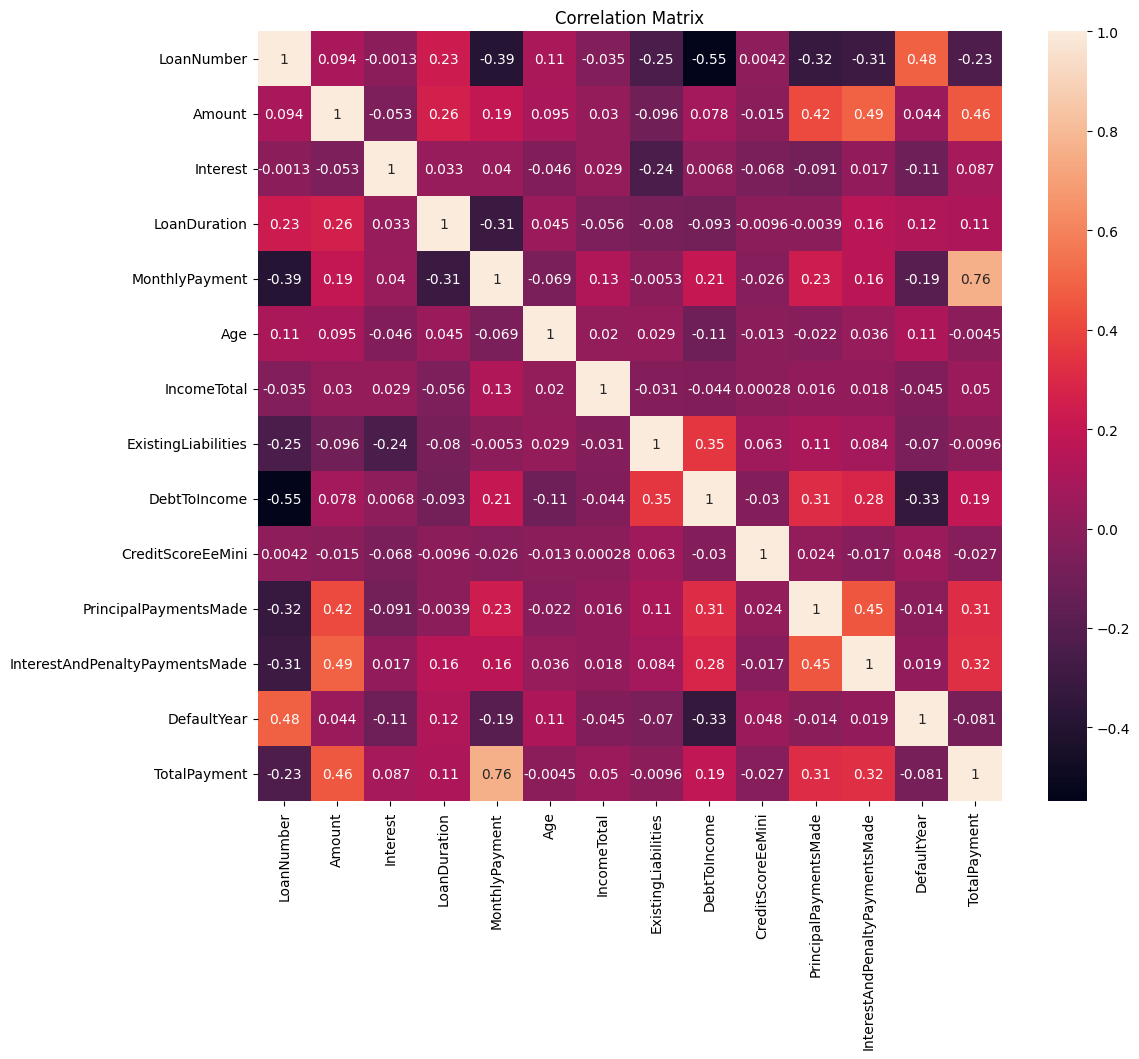

In [36]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_new.corr(), annot=True)
plt.title('Correlation Matrix')
plt.show()

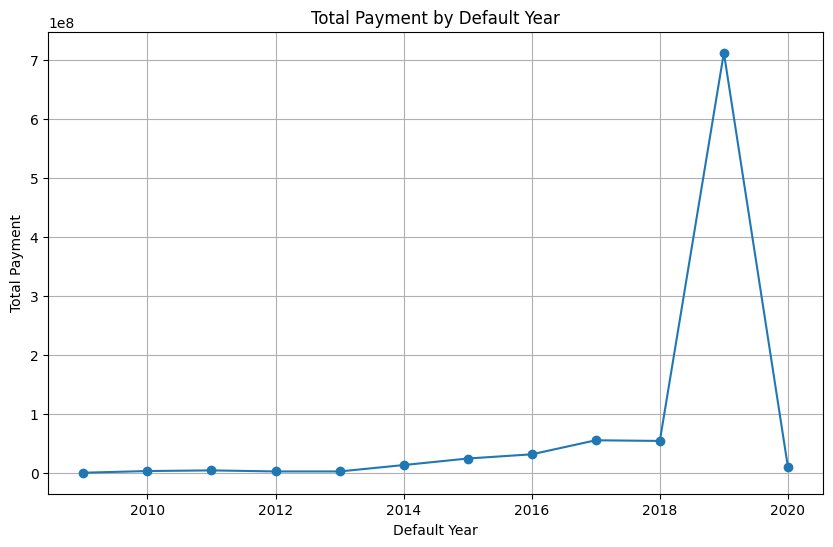

In [37]:
total_payment_by_year = df_new.groupby('DefaultYear')['TotalPayment'].sum()
plt.figure(figsize=(10, 6))
total_payment_by_year.plot(kind='line', marker='o')
plt.xlabel('Default Year')
plt.ylabel('Total Payment')
plt.title('Total Payment by Default Year')
plt.grid(True)
plt.show()

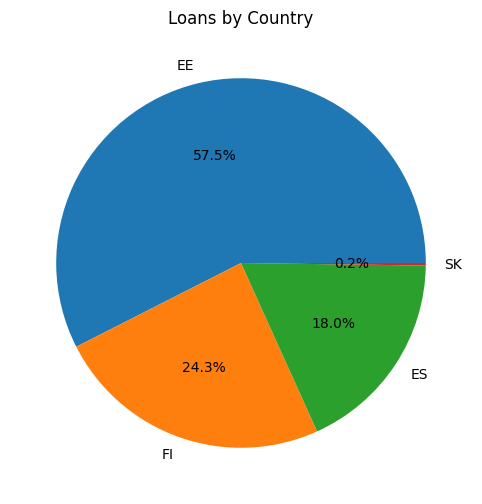

In [38]:
# Calculate the count of loans for each country
loan_counts = df_new['Country'].value_counts()
plt.figure(figsize=(10, 6))
loan_counts.plot(kind='pie', autopct='%1.1f%%',)
plt.title('Loans by Country')
plt.ylabel('')  # Remove the ylabel for cleaner presentation
plt.show()

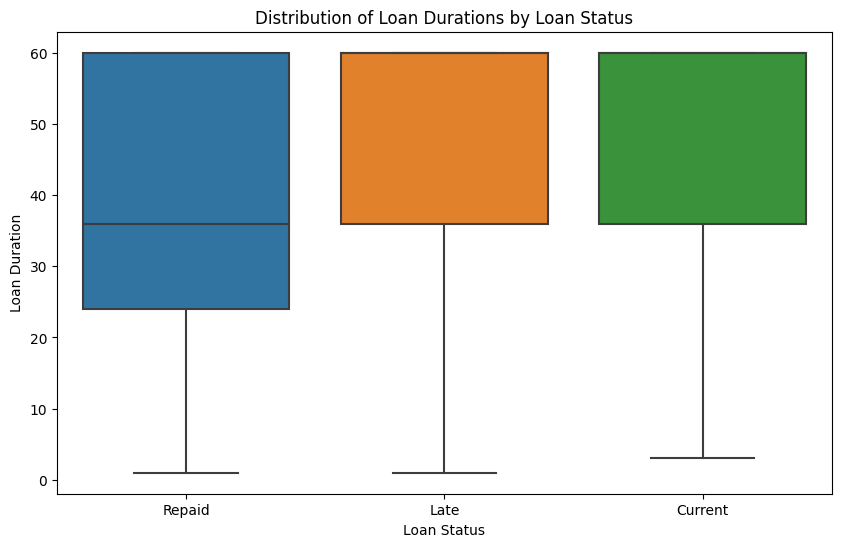

In [39]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_new['Status'], y=df_new['LoanDuration'])
plt.xlabel('Loan Status')
plt.ylabel('Loan Duration')
plt.title('Distribution of Loan Durations by Loan Status')
plt.show()

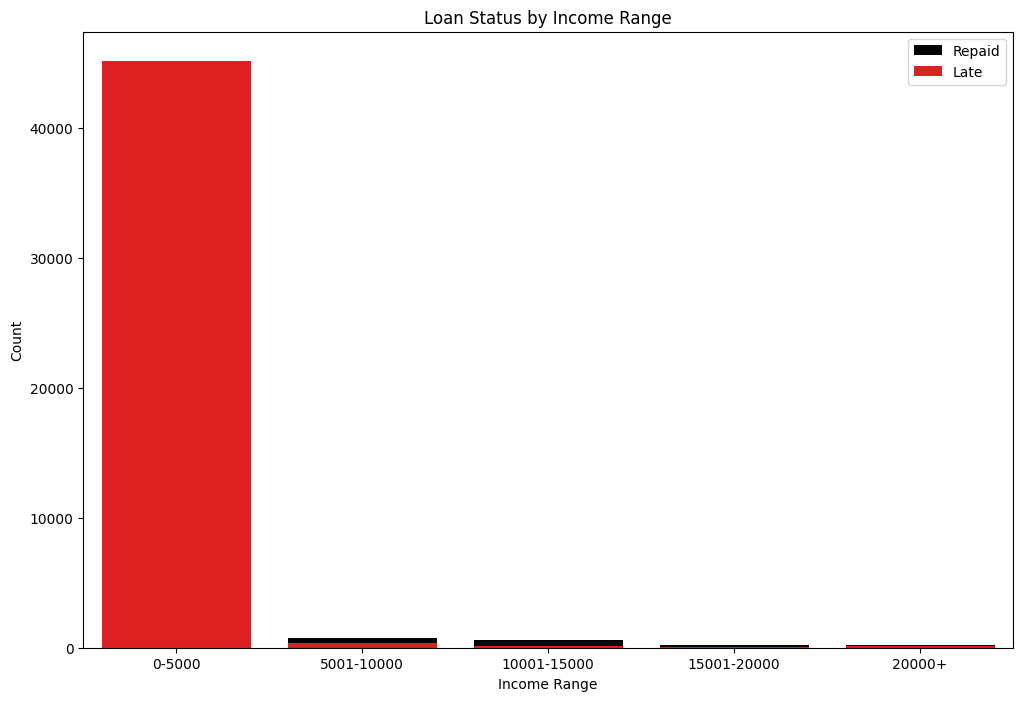

In [40]:
# Create income groups based on predefined bins or categories

income_groups = pd.cut(df_new['IncomeTotal'], bins=[0, 5000, 10000, 15000, 20000, np.inf])
income_groups_labels = ['0-5000', '5001-10000', '10001-15000', '15001-20000', '20000+']

# Calculate the loan status counts for each income group
loan_status_counts = df_new.groupby([income_groups, 'Status']).size().unstack()

# Plot the bar chart
plt.figure(figsize=(12, 8))
sns.barplot(x=income_groups_labels, y=loan_status_counts[df_new['Status'].unique()[0]], color='black', label=df_new['Status'].unique()[0])
sns.barplot(x=income_groups_labels, y=loan_status_counts[df_new['Status'].unique()[1]], color='red', label=df_new['Status'].unique()[1])

plt.xlabel('Income Range')
plt.ylabel('Count')
plt.title('Loan Status by Income Range')
plt.legend()
plt.show()


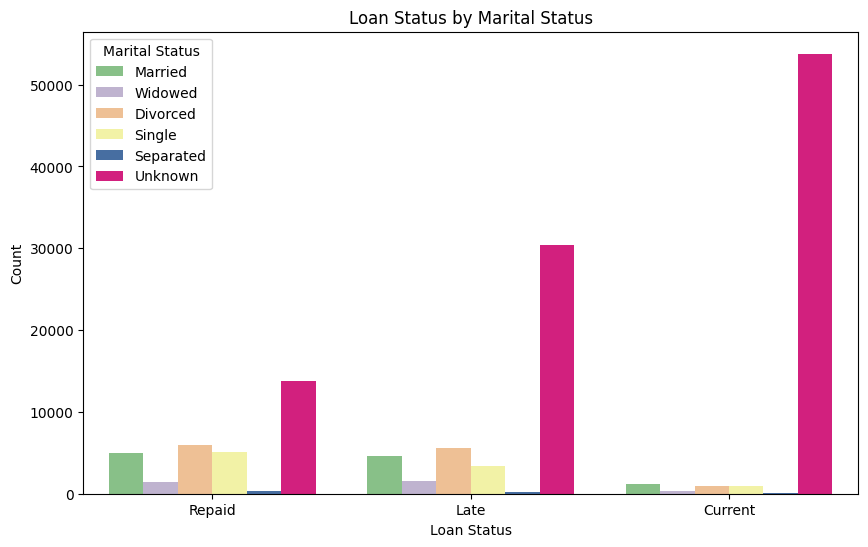

In [41]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', hue='MaritalStatus', data=df_new,palette = "Accent")

# Customize the plot
plt.title('Loan Status by Marital Status')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Marital Status')

# Show the plot
plt.show()

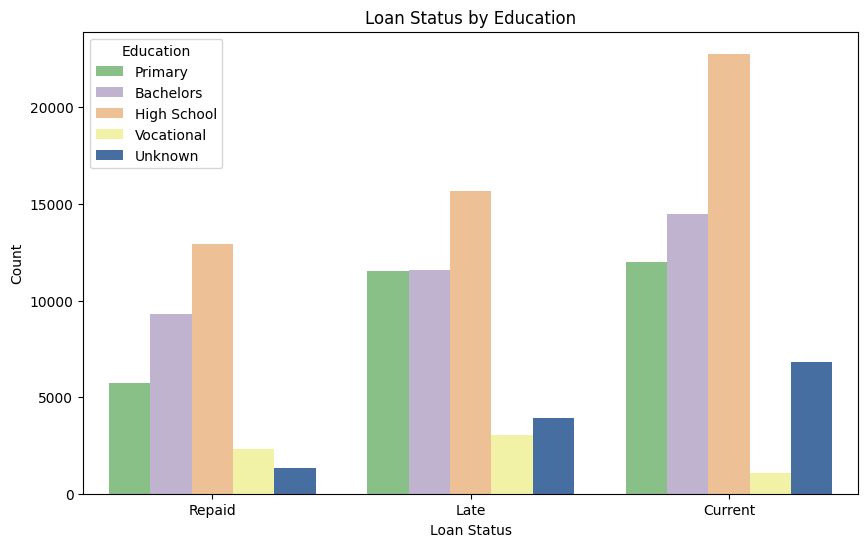

In [42]:
# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', hue='Education', data=df_new,palette = "Accent")

# Customize the plot
plt.title('Loan Status by Education')
plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.legend(title='Education')

# Show the plot
plt.show()


## Feature engineering

In [43]:
df_new['MaritalStatusEmployment'] = df_new['MaritalStatus'] + '_' + df_new['EmploymentStatus']

In [44]:
# Aggregation
grouped_data = df_new.groupby('Education').agg({'Amount': 'mean', 'IncomeTotal': 'median'})
grouped_data = grouped_data.rename(columns={'Amount': 'AvgLoanAmount', 'IncomeTotal': 'MedianIncome'})

In [45]:
scaler = MinMaxScaler()
df_new['Income_Scaled'] = scaler.fit_transform(df_new['IncomeTotal'].values.reshape(-1, 1))


In [46]:
df_new.head()

,LoanId,LoanNumber,Status,Amount,Interest,LoanDuration,MonthlyPayment,Age,Gender,Country,...,PrincipalPaymentsMade,InterestAndPenaltyPaymentsMade,DefaultDate,ActiveLateCategory,WorseLateCategory,DefaultYear,TotalPayment,AgeGroup,MaritalStatusEmployment,Income_Scaled
0,F0660C80-83F3-4A97-8DA0-9C250112D6EC,659,Repaid,115.0408,30.0,12,1250.48,61,Male,EE,...,115.0408,20.4222,Missing,Missing,91-120,2019.0,15005.76,50 and above,Married_Retired,0.010375
1,978BB85B-1C69-4D51-8447-9C240104A3A2,654,Repaid,140.6057,25.0,1,1250.48,48,Male,EE,...,140.6057,2.0227,Missing,Missing,Missing,2019.0,1250.48,30-49,Widowed_Retired,0.010672
2,EA44027E-7FA7-4BB2-846D-9C1F013C8A22,641,Late,319.5409,25.0,20,1250.48,58,Male,EE,...,203.1909,59.7626,2012-07-16 00:00:00,180+,180+,2012.0,25009.60,50 and above,Married_Retired,0.006917
3,CE67AD25-2951-4BEE-96BD-9C2700C61EF4,668,Repaid,57.5205,45.0,15,1250.48,23,Male,EE,...,57.5205,18.7323,Missing,Missing,31-60,2019.0,18757.20,18-29,Divorced_Unknown,0.011462
4,9408BF8C-B159-4D6A-9D61-9C2400A986E3,652,Repaid,319.5436,30.0,12,1250.48,25,Male,EE,...,319.5436,220.4200,2009-09-28 00:00:00,Missing,180+,2009.0,15005.76,18-29,Single_Retired,0.006719


In [47]:
grouped_data.head()

,AvgLoanAmount,MedianIncome
Education,,
Bachelors,2682.967895,1500.0
High School,2288.211140,1085.0
Primary,2904.197560,1500.0
Unknown,2545.019152,1150.0
Vocational,2177.044011,957.0


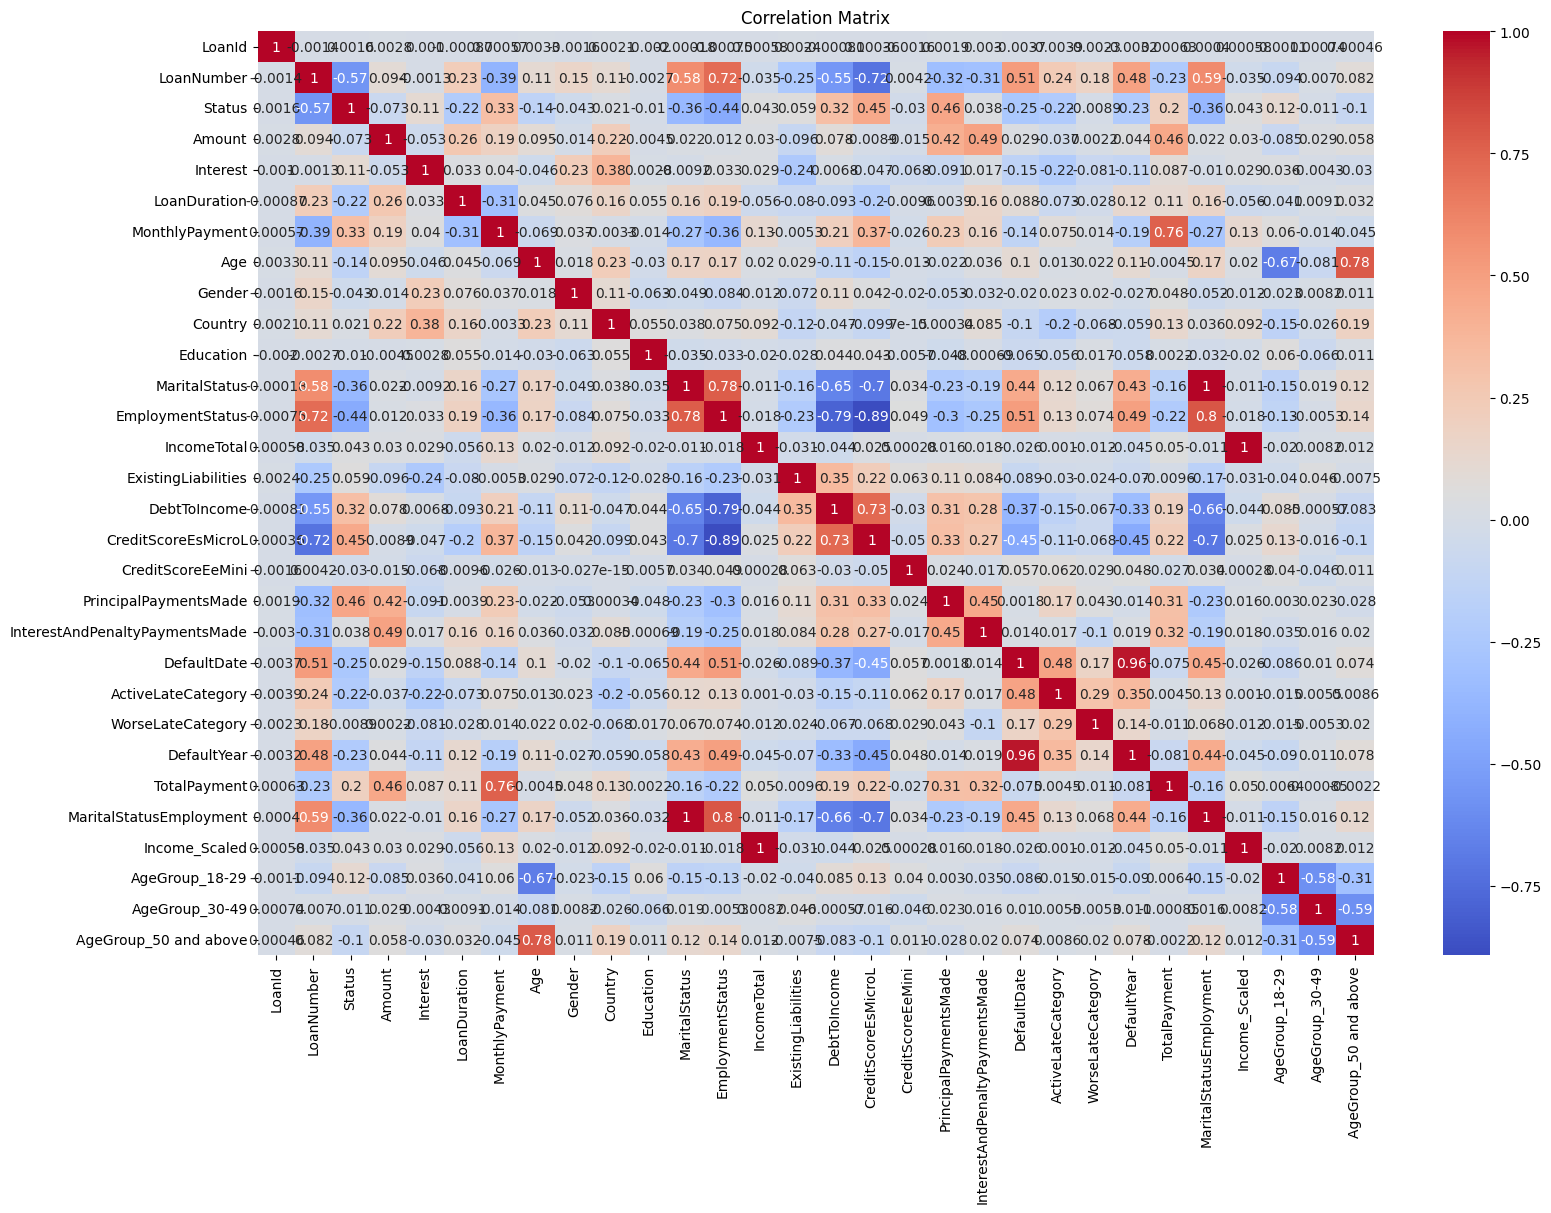

In [48]:
# Encode categorical variables
non_numeric_cols = df_new.select_dtypes(include=['object']).columns.tolist()
for col in non_numeric_cols:
    df_new[col] = df_new[col].astype('category').cat.codes

# One-hot encode the 'AgeGroup' column
df_new = pd.get_dummies(df_new, columns=['AgeGroup'], drop_first=True)

#correlation matrix
corr_matrix = df_new.corr()
plt.figure(figsize=(18, 12))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [49]:
# Perform PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep components that explain 95% of the variance
pca_result = pca.fit_transform(df_new.drop(columns=['LoanId', 'LoanNumber', 'Status']))

# Create a new DataFrame with the PCA results
df_pca = pd.DataFrame(data=pca_result, columns=[f'PC{i+1}' for i in range(pca_result.shape[1])])

# Concatenate the PCA results with the original DataFrame
df_new_pca = pd.concat([df_new[['LoanId', 'LoanNumber', 'Status']], df_pca], axis=1)

# Print the updated DataFrame
print(df_new_pca.head())

   LoanId  LoanNumber  Status           PC1          PC2          PC3
0  126285         659       2   8142.290714  8444.490847 -3644.070398
1   79501         654       2  -5461.807704  9305.708910 -1815.936149
2  123113         641       1  17938.245646  4540.142791 -4734.121902
3  108353         668       2  11891.881355  9390.629384 -4210.345354
4   77630         652       2   8036.206015  4748.608457 -3356.789013


Naive Bayes

In [50]:
# Separate features and target variable
X = df_new_pca.drop(['LoanId', 'LoanNumber', 'Status'], axis=1)
y = df_new_pca['Status']

In [51]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
# Initialize and train the Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = nb_classifier.predict(X_test)

In [54]:
# Evaluate the classifier's performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4719765108154315


In [55]:
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.46      0.92      0.62     11396
           1       0.47      0.09      0.16      9006
           2       0.56      0.21      0.30      6504

    accuracy                           0.47     26906
   macro avg       0.50      0.41      0.36     26906
weighted avg       0.49      0.47      0.39     26906



In [56]:
# Generate a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[10509   451   436]
 [ 7533   838   635]
 [ 4668   484  1352]]
